In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv("prep_data.csv")
df.head()

,area,baths,beds,latitude,longitude,pricearea,coastdist,buildingtype_Building,buildingtype_Co-op,buildingtype_Commercial Building,...,neighborhood_Woodrow,neighborhood_Woodside,neighborhood_Woodstock,neighborhood_Yorkville,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,price
0,2670,3.5,3.0,40.719002,-74.003197,2097.378277,746.610278,0,0,0,...,0,0,0,0,0,0,1,0,0,5600000.0
1,2240,3.5,3.0,40.763500,-73.964798,1158.482143,501.933846,0,1,0,...,0,0,0,0,0,0,1,0,0,2595000.0
2,820,1.0,1.0,40.766998,-73.984901,1213.414634,598.449219,0,0,0,...,0,0,0,0,0,0,1,0,0,995000.0
3,884,1.5,1.0,40.746300,-73.972702,1385.746606,257.252040,0,0,0,...,0,0,0,0,0,0,1,0,0,1225000.0
4,1599,2.0,2.0,40.766800,-73.984200,2873.671044,647.078718,0,0,0,...,0,0,0,0,0,0,1,0,0,4595000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15298 entries, 0 to 15297
Columns: 308 entries, area to price
dtypes: float64(7), int64(301)
memory usage: 35.9 MB


In [5]:
corr = df.corr()
corr['price'].sort_values(ascending=True)

longitude                         -0.218206
coastdist                         -0.191850
borough_brooklyn                  -0.181704
borough_queens                    -0.174058
buildingtype_Co-op                -0.163478
borough_bronx                     -0.104624
buildingtype_House                -0.098386
neighborhood_Hunters Point        -0.068693
neighborhood_Forest Hills         -0.053295
borough_staten_island             -0.052808
buildingtype_Multi-family         -0.051168
neighborhood_Jackson Heights      -0.049304
neighborhood_Sheepshead Bay       -0.045519
neighborhood_Spuyten Duyvil       -0.045516
neighborhood_Riverdale            -0.044127
neighborhood_Homecrest            -0.043239
neighborhood_Brighton Beach       -0.042015
neighborhood_Williamsburg         -0.041953
neighborhood_Flushing             -0.038259
neighborhood_Bedford-Stuyvesant   -0.037332
neighborhood_Astoria              -0.035457
neighborhood_Coney Island         -0.034237
neighborhood_Northeast Flatbush 

In [5]:
lst = ["area", "baths", "beds", "coastdist", "price"]

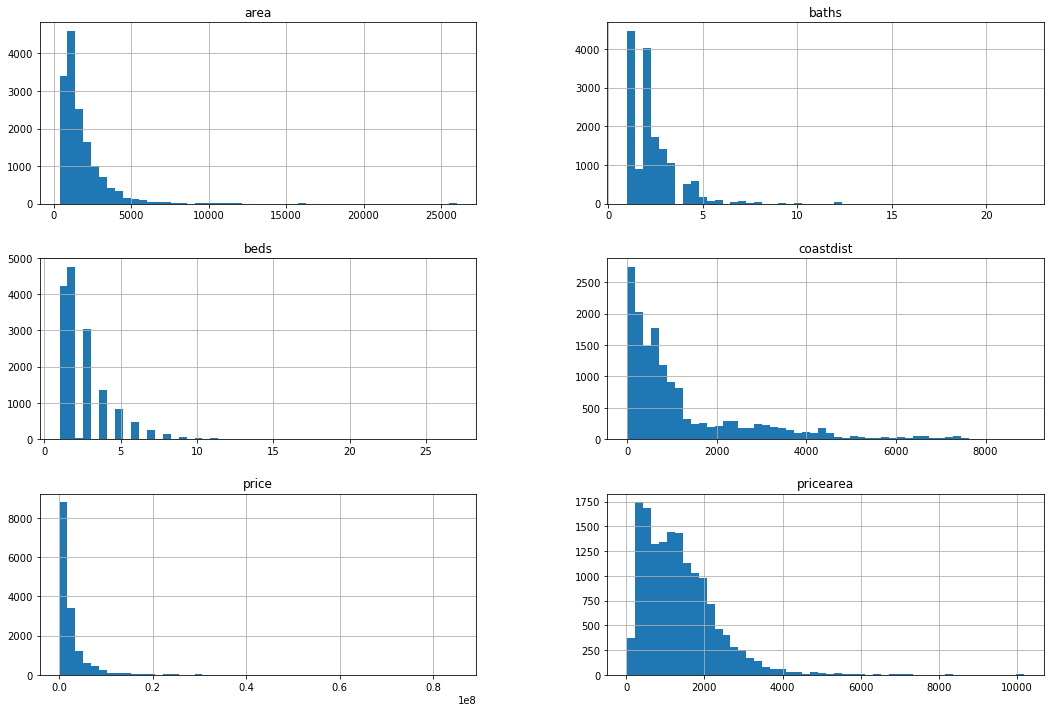

In [6]:
df[lst].hist(bins=50, figsize=(18,12))
plt.show()

In [7]:
# log transformations of skewed features (a function is desirable...)
for l in lst:
    df[l] = np.log1p(df[l])

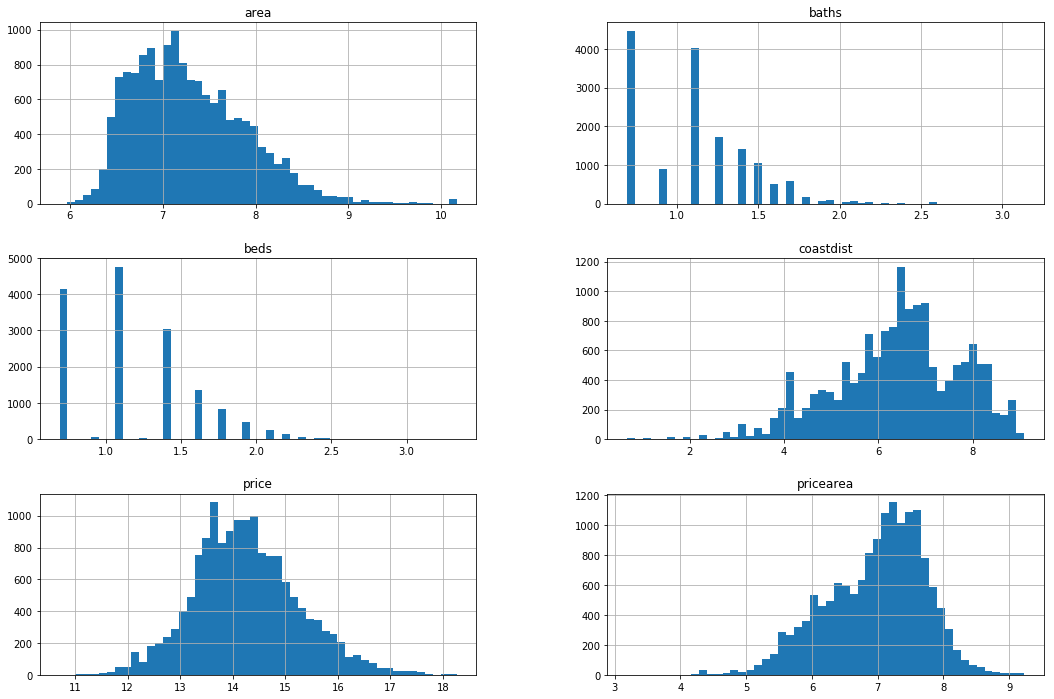

In [8]:
df[lst].hist(bins=50, figsize=(18,12))
plt.show()

**Inasmuch as I think there are no redundant features in the current data, I will perform selection after running the model with all features.**

In [9]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [10]:
sscaler = StandardScaler()
rscaler = RobustScaler()

**Do dummy variables need to be scaled...? NO**

In [21]:
# features to be scaled
to_scale_df = df[lst]
to_scale_df.loc[:,"latitude"] = df["latitude"]
to_scale_df.loc[:,"longitude"] = df["longitude"]

# dataframe of dummy variables
dummy_df = df.drop(df[lst], axis=1)
dummy_df = dummy_df.drop(["latitude","longitude"], axis=1)

# scaling the target variable as well
# target_array = df["price"]

In [22]:
to_scale_df.describe()

,area,baths,beds,coastdist,pricearea,price,latitude,longitude
count,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000
mean,7.286205,1.118461,1.197049,6.409346,6.974139,14.258262,40.728319,-73.958146
std,0.606849,0.360852,0.415112,1.341509,0.747458,0.999962,0.063780,0.057521
min,5.888878,0.693147,0.693147,0.674869,3.190234,10.703267,40.501499,-74.240799
25%,6.810142,0.693147,0.693147,5.612270,6.460004,13.586099,40.695099,-73.990097
50%,7.192934,1.098612,1.098612,6.532991,7.095370,14.187075,40.736344,-73.967960
75%,7.669962,1.386294,1.386294,7.351316,7.522472,14.876767,40.764599,-73.945224
max,10.165890,3.135494,3.332205,9.089805,9.228742,18.258162,40.912800,-73.707703


In [23]:
to_scale_df.head()

,area,baths,beds,coastdist,pricearea,price,latitude,longitude
0,7.890208,1.504077,1.386294,6.616882,7.648920,15.538277,40.719002,-74.003197
1,7.714677,1.504077,1.386294,6.220459,7.055729,14.769097,40.763500,-73.964798
2,6.710523,0.693147,0.693147,6.396011,7.102017,13.810499,40.766998,-73.984901
3,6.785588,0.916291,0.693147,5.553936,7.234716,14.018452,40.746300,-73.972702
4,7.377759,1.098612,1.098612,6.474012,7.963694,15.340480,40.766800,-73.984200


In [24]:
dummy_df.head()

,buildingtype_Building,buildingtype_Co-op,buildingtype_Commercial Building,buildingtype_Condo,buildingtype_Condop,buildingtype_House,buildingtype_Multi-family,buildingtype_Other type,buildingtype_Single-Family Home,buildingtype_Townhouse,...,neighborhood_Woodlawn,neighborhood_Woodrow,neighborhood_Woodside,neighborhood_Woodstock,neighborhood_Yorkville,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
scaled_array = sscaler.fit_transform(to_scale_df)
scaled_df = pd.DataFrame(data=scaled_array, columns=["area", "baths", "beds", "coastdist", "pricearea","price", "latitude", "longitude"])
# scaled_target = rscaler.fit_transform(target_array.values.reshape(-1, 1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB0FDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000E0DE0F0>]], dtype=object)

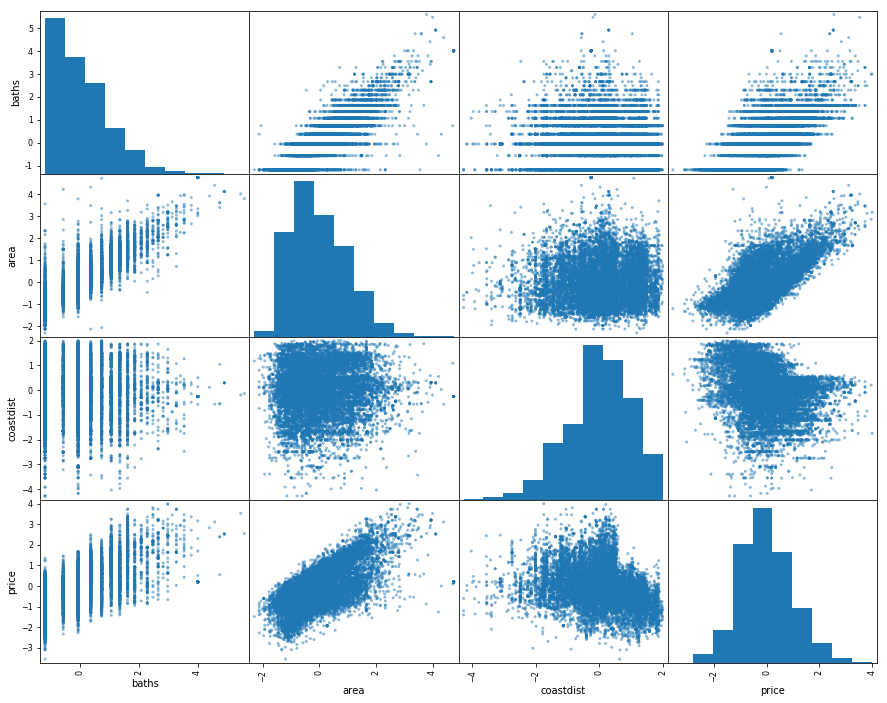

In [26]:
from pandas.plotting import scatter_matrix as scatt
attr = ['beds', 'baths', 'area', 'coastdist', 'price']
scatt(scaled_df[attr], figsize=(15, 12))

In [27]:
scaled_df.head()

,area,baths,beds,coastdist,pricearea,price,latitude,longitude
0,0.995344,1.068661,0.455906,0.154708,0.902798,1.280106,-0.146094,-0.783225
1,0.706085,1.068661,0.455906,-0.140807,0.109160,0.510872,0.551610,-0.115644
2,-0.948672,-1.178676,-1.213933,-0.009941,0.171091,-0.447794,0.606458,-0.465152
3,-0.824973,-0.560277,-1.213933,-0.637668,0.348629,-0.239826,0.281919,-0.253060
4,0.150873,-0.055008,-0.237140,0.048205,1.323937,1.082294,0.603348,-0.452949


In [28]:
new_df = pd.concat([scaled_df, dummy_df], axis=1)
new_df.head()

,area,baths,beds,coastdist,pricearea,price,latitude,longitude,buildingtype_Building,buildingtype_Co-op,...,neighborhood_Woodlawn,neighborhood_Woodrow,neighborhood_Woodside,neighborhood_Woodstock,neighborhood_Yorkville,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island
0,0.995344,1.068661,0.455906,0.154708,0.902798,1.280106,-0.146094,-0.783225,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.706085,1.068661,0.455906,-0.140807,0.109160,0.510872,0.551610,-0.115644,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.948672,-1.178676,-1.213933,-0.009941,0.171091,-0.447794,0.606458,-0.465152,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.824973,-0.560277,-1.213933,-0.637668,0.348629,-0.239826,0.281919,-0.253060,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150873,-0.055008,-0.237140,0.048205,1.323937,1.082294,0.603348,-0.452949,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# new_df.to_csv("scaled_data.csv", index=False)

**I need to create a hold-out set...**

The split will be 80% train & cross-val, 20% hold-out

In [23]:
# I did this at first but had to use train_test_split to ensure data would be consistent over muliple runs
'''hold_out = np.random.rand(len(new_df)) < 0.2
hold_df = new_df[hold_out]
used_df = new_df[~hold_out]
print len(hold_df)
print len(used_df)'''

from sklearn.model_selection import train_test_split
X_used, X_hold_out, y_used, y_hold_out = train_test_split(new_df, target_array, test_size=0.20, random_state = 13)
print len(X_used), len(y_used)
print len(X_hold_out), len(y_hold_out)

12238 12238
3060 3060


### Model Equation
- Multivariate Linear Regression:

 $y = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum\limits_{i=0}^{\infty} w_ix_i = w^Tx$
 
 where $w^T$ is the transpose of the matrix of regression coefficients...

#### Cost function

  $$\frac{1}{m}\sum\limits_{i=1}^m(h_\theta (X^i) - y^i)^2$$
  
                                                              OR
 
 $$ \sqrt{\frac{1}{m}\sum\limits_{i=1}^m(h_\theta (X^i) - y^i)^2}$$
 
MSE is supposed to ensure error is unbiased and follows a normal distribution. RMSE is more relatable in numerical terms.

In [6]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor as randforreg
from sklearn.model_selection import cross_val_score as cval
from sklearn import metrics

reg = linear_model.LinearRegression()
rdg = linear_model.RidgeCV()
las = linear_model.LassoCV()
ela = linear_model.ElasticNetCV()

**First up, Linear Regression.**

In [25]:
model = reg.fit(X_used, y_used)
y_pred = reg.predict(X_hold_out)

In [37]:
pred_figures = rscaler.inverse_transform(y_pred.reshape(-1, 1))
real_figures = rscaler.inverse_transform(y_hold_out.values.reshape(-1, 1))

In [38]:
print "RMSE:",(metrics.mean_squared_error(real_figures, pred_figures)) ** 0.5

RMSE: 1.35345473069e+23


**How can multicollinearity of independent variables be determined...?**

**A correlation matrix!**